# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [4]:
sinasc_raw['munResLat'].describe()

count    27027.000000
mean       -10.377988
std          1.372942
min        -13.499760
25%        -11.433870
50%        -10.435950
75%         -8.768890
max         -8.768890
Name: munResLat, dtype: float64

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
mapping = {}
operacoes = ['sum','mean','min','max','median','std','var']
for dado in sinasc_raw['munResLat']:
    if dado <= -10.5:
        sts = 'Abaixo de -10.5'
    else:
        sts = 'Acima de -10.5'
    mapping[dado] = sts
sinasc_1 = sinasc_raw.set_index('munResLat')
sinasc_1.groupby(mapping).agg({
    'QTDFILVIVO': operacoes,
    'munResArea': operacoes})


QTDFILVIVO                                                  \
                       sum      mean  min   max median       std       var   
munResLat                                                                    
Abaixo de -10.5    12600.0  0.980011  0.0  30.0    1.0  1.138300  1.295727   
Acima de -10.5     14226.0  1.129317  0.0  12.0    1.0  1.198613  1.436674   

                   munResArea                                               \
                          sum          mean      min        max     median   
munResLat                                                                    
Abaixo de -10.5  8.360143e+07   6434.344207  459.978  24855.724   5067.384   
Acima de -10.5   3.137711e+08  22357.926110  965.676  34096.394  34096.394   

                                             
                          std           var  
munResLat                                    
Abaixo de -10.5   5688.822159  3.236270e+07  
Acima de -10.5   14488.909375  2.099285e+08

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [6]:
area = {}
operacoes = ['sum','mean','min','max','median','std','var']
for dado in sinasc_raw['munResArea']:
    if dado <= 3000:
        x = "Abaixo de 3000"
    else:
        x = "Acima de 3000"
    area[dado] = x
    
sinasc_2 = sinasc_raw.set_index('munResArea')
sinasc_2.groupby(area).agg({
    'CONSULTAS': operacoes,
    'IDADEMAE' : operacoes
})

CONSULTAS                                               \
                     sum      mean min max median       std       var   
munResArea                                                              
Abaixo de 3000     19520  3.740180   1   9    4.0  0.607492  0.369046   
Acima de 3000      77142  3.537326   1   9    4.0  0.820967  0.673986   

               IDADEMAE                                                 
                    sum       mean min max median       std        var  
munResArea                                                              
Abaixo de 3000   137389  26.324775  11  53   26.0  6.305535  39.759775  
Acima de 3000    567848  26.038518  12  53   25.0  6.405497  41.030387

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
sinasc_raw['munResAlt'].describe()
media = sinasc_raw['munResAlt'].mean().round()
alt = {}
operacoes = ['sum','mean','min','max','median','std','var']
for dado in sinasc_raw['munResAlt']:
    if dado <= media:
        x = f"Abaixo de {media}"
    else:
        x = f"Acima de {media}"
    alt[dado] = x
    
sinasc_3 = sinasc_raw.set_index("munResAlt")
sinasc_3.groupby(alt).agg({
    'QTDGESTANT': operacoes,
    'PESO' : operacoes
})


QTDGESTANT                                                  \
                       sum      mean  min   max median       std       var   
munResAlt                                                                    
Abaixo de 179.0    24096.0  1.338369  0.0  52.0    1.0  1.477801  2.183895   
Acima de 179.0      8820.0  1.129177  0.0  12.0    1.0  1.206823  1.456423   

                     PESO                                              \
                      sum         mean  min   max  median         std   
munResAlt                                                               
Abaixo de 179.0  62231252  3248.995092  292  5480  3275.0  548.400155   
Acima de 179.0   25422490  3229.072780  258  5985  3260.0  535.587126   

                                
                           var  
munResAlt                       
Abaixo de 179.0  300742.729992  
Acima de 179.0   286853.569524

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [10]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

sinasc_4 = sinasc_raw.set_index('munResNome')
sinasc_4['DTNASC'] = pd.to_datetime(sinasc_4['DTNASC'])
sinasc_4['ANO_MES'] = sinasc_4['DTNASC'].dt.to_period('M')
idade_media = (
    sinasc_4.groupby(['ANO_MES',imediatas])['IDADEMAE']
    .mean()
    .unstack()
)
idade_media

munResNome,Ariquemes,Cacoal,Jaru,Ji-Paraná,Porto Velho,Vilhena
ANO_MES,,,,,,
2019-01,24.866412,26.350543,26.086667,25.792056,26.017668,26.665049
2019-02,25.316239,25.969444,25.586777,26.417949,26.215000,26.781818
2019-03,25.288660,26.319410,26.215686,25.490364,26.347207,26.386667
2019-04,25.411972,26.235149,25.291667,26.075862,26.172336,26.686099
2019-05,25.410256,26.031008,25.187050,25.931264,25.830470,25.586207
2019-06,26.652510,25.845333,26.055944,26.272727,26.421628,26.526627
2019-07,24.973783,26.780488,24.611111,25.809399,26.139903,26.373057
2019-08,25.684615,26.539106,25.864865,25.938144,26.070588,26.297436
2019-09,25.561644,26.779126,25.748299,25.640177,25.966435,26.407407


<Figure size 1800x900 with 0 Axes>

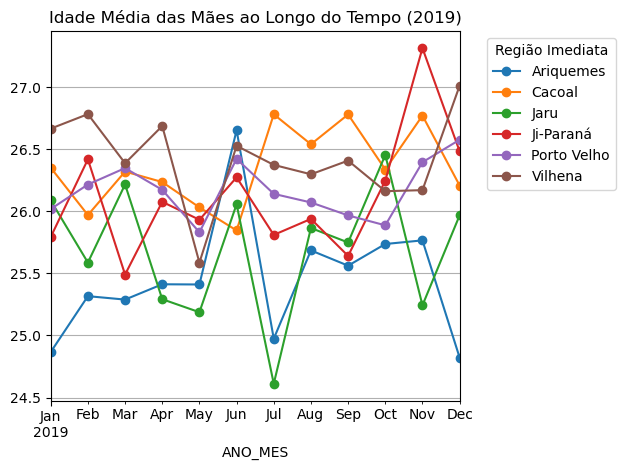

In [31]:
plt.figure(figsize=(18,9))
idade_media.plot(marker='o')
plt.title('Idade Média das Mães ao Longo do Tempo (2019)')
plt.legend(title='Região Imediata', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [23]:
IDH = pd.read_csv('IDH.csv',sep=';')
IDH = IDH.set_index('Cidade')['Status'].to_dict()
sinasc_5 = sinasc_raw.set_index('munResNome')
sinasc_5.groupby(IDH)['IDADEMAE'].mean()

munResNome
Alto     26.280332
Baixo    25.269231
Médio    25.848191
Name: IDADEMAE, dtype: float64

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [27]:
ifdm = pd.read_csv('IFDM.csv', sep=";")
ifdm.head()
ifdm = ifdm.set_index('Cidade')['Indice'].to_dict()
sinasc_6 = sinasc_raw.set_index('munResNome')
sinasc_6.groupby(ifdm)['QTDFILVIVO'].sum()

munResNome
Moderado    20607.0
Regular      4155.0
Name: QTDFILVIVO, dtype: float64

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [31]:
PIB = pd.read_csv('PIB.csv',sep=';')
PIB = PIB.set_index('Cidade')['Indice'].to_dict()
sinasc_7 = sinasc_raw.set_index('munResNome')
sinasc_7.groupby(PIB)['PESO'].mean()

munResNome
Acima de 1 Bilhão       3247.215719
Acima de 100 Milhões    3250.392337
Acima de 200 Milhões    3233.701349
Acima de 300 Milhões    3240.387380
Acima de 500 Milhões    3243.336315
Até 100 Milhões         3197.679045
Name: PESO, dtype: float64

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

- A média das idades das mães nos mês de Junho tem uma elevação consideravel, exceto na região de Cocal
- A qunatidade de filhos vivos onde o IFDM é moderado é mais que o dobro em relação a regiões regulares
- A média de idade das mães em regiões com o IDH mais alto, é maior que as demais.